In [3]:
import numpy as np
import matplotlib.pyplot as plt

## *Задача 1.  Генератор матриц* 


Реализовать генератор матрциц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация вырожденной матрицы
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$

Оценить вероятность того, что созданная матрица будет вырожденной. 

Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).


In [47]:
def generator(shape, mtype=None, eps=1e-12):
    """
    mtype: diag, triu, tril, symmetric, singular
    size: 2d-tuple
    eps: eps for perturbation matrix
    """
    
    M = np.random.random(shape)
    
    if mtype is None:
        return M
    elif mtype == "triu":
        return np.triu(M)
    elif mtype == "tril":
        return np.tril(M) 
    elif mtype == "symmetric":
        if shape[0]==shape[1]:
            return (M+M.T)/2
        else:
            raise ValueError("Incorrect dimensions")
            
    elif mtype == "diag":
        if shape[0]==shape[1]:
            v = np.random.random(shape[0])
            return np.diag(v)
        else:
            raise ValueError("Incorrect dimensions")
    elif mtype == "singular":
        if shape[0]==shape[1]:
            v = np.random.random(shape[0])
            return v.T @ v
        else:
            raise ValueError("Incorrect dimensions")
            
    elif mtype == "step":
        m, n = shape 
        if m <= n:
            A = np.random.random((n, n))
            return np.triu(A, k=n-m)
        else:
            raise ValueError("m should be less or equal to n")
            
    elif mtype == "pert":
        return eps*np.random.random(shape)


In [48]:
generator((3,3), "diag")

array([[0.3440984 , 0.        , 0.        ],
       [0.        , 0.99896971, 0.        ],
       [0.        , 0.        , 0.47690296]])

# Задача 2. Эквивалентность первых двух норм.


Найдите константы $C_1$  и  $C_2$ такие, что

$\ C_1||\mathbf{x}||_2\leq||\mathbf{x}||_1\leq C_2||\mathbf{x}||_2$ 


Указание: в качестве подсказки можно использовать визуализацию норм из документа с теорией. 

$||x||_2 \le ||x||_1 \le \sqrt{n}||x||_2$


- $||x||^2_1 = \sum_i |x_i|^2 + \sum_{i\neq j} |x_i||x_j| \ge \sum_i |x_i|^2 =||x||_2 $

- Неравенство о средних: $\frac{\sum |x_i|}{n} \le \sqrt{\frac{\sum |x_i|^2}{n}} \Leftrightarrow ||x||_1 \le \sqrt{n} ||x||_2$

# Задача 3.  Евклидова и бесконечная норма.

 Пусть x — вектор размерности n, а A — матрица m×n. Докажите следующие неравенства и приведите
примеры таких x и A, при которых неравенства обращаются в равенства: 

- $\|x\|_2 \leq \sqrt{m}\|x\|_{\infty}$
- $\|A\|_{\infty} \leq \sqrt{n}\|A\|_2$

- $||x||_2 = \sqrt{\sum_{i=1}^m |x_i|^2} \le \sqrt{\sum_{i=1}^m (\max_{1 \le i\le m}|x_i|)^2} = \sqrt{\sum_{i=1}^m ||x||^2_\infty} = \sqrt{m}||x||_\infty$


$||A||_\infty  =\text{sup} \frac{||Ax||_\infty}{||x||_\infty} \leq \text{sup} \frac{||Ax||_2}{||x||_2/\sqrt{n}} = \sqrt{n}||A||_2$

Знаем, что $||x||_\infty \leq \|x\|_2 \leq \sqrt{n}\|x\|_{\infty}$

# Задача 4. Норма Фробениуса.

Докажите, что для любой унитарной матрицы U (и для произвольной матрицы A) имеет место равенство

 $∥UA∥_F = ∥AU∥_F = ∥A∥_F$ , 
 
 где $∥ ∥_F$ — норма Фробениуса.

Указание.  
Задачу можно решить без вычислений, если использовать геометрический смысл нормы Фробениуса и геометрические свойства умножения на унитарную матрицу (что при умножении на неё сохраняется). 

$||A||_F = \sqrt{trace(AA^\dagger)} = \sqrt{trace(AUU^\dagger A^\dagger)} = \sqrt{trace(AU (AU)^\dagger)} = ||AU||_F$

$||A||_F = \sqrt{trace(A^\dagger A)} = \sqrt{trace(A^\dagger U^\dagger U A)} = \sqrt{trace((UA)^\dagger UA)} = ||UA||_F$

# Задача 5. Тензорная свёртка.  

Рассмотрим функцию, отображающую шесть тензоров на один тензор: $Z\left(\lambda^{(1)}, \lambda^{(2)}, \lambda^{(3)}, \Gamma^{(1)}, \Gamma^{(2)}, U\right)$ :


$$
Z_{a h i j}=\sum_{b c d e f g} \lambda^{(1)}{ }_{a b} \Gamma_{c b d}^{(1)} \lambda^{(2)}{ }_{d e} \Gamma_{f e g}^{(2)} \lambda_{g h}^{(3)} U_{i j c f}
$$ 

редположив, что все индексы пробегают значения от 1 до χ, проведите эксперимент и сравните скорость
различных реализаций функции Z. Исследуйте значения χ в диапазоне 3–50. 


- В файле convolution. ipynb вы можете найти релизацию глупого способа вычисления этой свертки, который требует $\chi^4 \times \chi^6=\chi^{10}$ операций. На самом деле это можно вычислить гораздо быстрее!
- С помощью функции numpy . einsum (нужно использовать аргумент optimize), можно добиться намного большей производительности. Чтобы понять, что происходит под капотом, воспользуйтесь функцией numpy.einsum_path. Какое минимальное количество операций требуется для вычисления $Z$ ?
- Посмотрев на вывод функции numpy.einsum_path, peализуйте алгоритм для вычисления $Z$, который столь же эффективен, как numpy.einsum, но использует более элементарные numpy.dot и numpy.tensor_dot.

In [92]:
c = 3

In [93]:
# Generate some data
np.random.seed(42)
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

In [94]:
def Z_naive(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]
    Z = np.zeros(shape=(c, c, c, c))
    for a, b, c, d, e, f, g, h, i, j in itertools.product(*([range(c)]*10)):
        Z[a, h, i, j] += lambda1[a, b]*lambda2[d, e]*lambda3[g, h]*G1[c, b, d]*G2[f, e, g]*U[i, j, c, f]
    return Z

def Z(lambda1, lambda2, lambda3, G1, G2, U):
    return np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize=True)

In [95]:
# %timeit -n 2 -r 2 Z_naive(lambda1, lambda2, lambda3, G1, G2, U)
%timeit -n 10 -r 2 Z(lambda1, lambda2, lambda3, G1, G2, U)

615 µs ± 144 µs per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [96]:
print(Z_naive(lambda1, lambda2, lambda3, G1, G2, U).shape)
print(Z(lambda1, lambda2, lambda3, G1, G2, U).shape)

(3, 3, 3, 3)
(3, 3, 3, 3)


In [97]:
print((np.sum(Z(lambda1, lambda2, lambda3, G1, G2, U) - Z_naive(lambda1, lambda2, lambda3, G1, G2, U))**2))

4.99716543697806e-26


In [98]:
print(*np.einsum_path("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize=True))

['einsum_path', (0, 1), (0, 1), (0, 3), (1, 2), (0, 1)]   Complete contraction:  ab,cbd,de,feg,gh,ijcf->ahij
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  3.543e+05
  Optimized FLOP count:  2.431e+03
   Theoretical speedup:  145.740
  Largest intermediate:  8.100e+01 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                 cbd,ab->acd                 de,feg,gh,ijcf,acd->ahij
   4                 feg,de->dfg                    gh,ijcf,acd,dfg->ahij
   4                 dfg,gh->dfh                       ijcf,acd,dfh->ahij
   5               dfh,acd->acfh                          ijcf,acfh->ahij
   6             acfh,ijcf->ahij                               ahij->ahij


__np.einsum__ вычисляет свёртку тензоров, причём разбивает суммирование на несколько этапов:
 
- вычисляет части свёртки по отдельности, создаёт промежуточные массивы(тензоры)
- вычисляет свёртку от новых тензоров

__Наивный способ__

Для $Z_{ahij}=\underset{bcdefg}{\sum}\lambda^{(1)}_{ab}\Gamma^{(1)}_{cbd}\lambda^{(2)}_{de}\Gamma^{(2)}_{feg}\lambda^{(3)}_{gh}U_{ijcf}$ с размерностью индексов $\chi$ есть 6 индексов суммирования, т.е. $Z_{ahij}$ вычисляется за $\chi ^ 6$, весь тензор за $\chi ^ 6 \cdot\chi ^ 4$

__Оптимизированный способ__

Делаются свёртки 

- $\lambda^{(1)}_{ab}\Gamma^{(1)}_{cbd} = A_{acd}$ за $\chi$, т.е. $A$ за $\chi^4$


- $\lambda^{(2)}_{de}\Gamma^{(2)}_{feg} = B_{dfg}$, за $\chi$, т.е. $B$ за $\chi^4$

На этом моменте у нас есть два новых тензора $A, B$, которые мы вычислили за $2 \chi^4$

- $B_{dfg}\lambda^{(3)}_{gh}=C_{dfh}$ за $\chi$, т.е. $C$ за $\chi^4$

Добавляется ещё один тензор $C$, который мы вычислили за $\chi^4$, так как тензоры $B, \lambda^{(3)}$ были уже известны. На данный момент $3 \chi^4$ операций


- $C_{dfh}A_{acd}=D_{acfh}$ за $\chi$, т.е. $D$ за $\chi^3$

Новый тензор $D$, суммарно $3 \chi^4 + \chi^5$ операций


- $D_{acfh}U_{ijcf} = Z_{ahij}$ за $\chi^{2}$, т.е. ещё $\chi^{6}$ операций

В итоге вычислили тензор $Z$ за $O(\chi^{6})$ операций, наивный способ совершает $O(\chi^{10})$ операций. Оптимизация сложности происходит за счёт дополнительного расхода памяти, упрощения выражения, поэтому для небольшого числа операций лучше использовать обычное суммирование.

Для $\chi = 1$ получается (x0.02)


naive:  3.59 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

optimised: 225 µs ± 3.51 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Для $\chi = 4$ получается (x4000)


naive: 1.59 s ± 25.5 ms per loop (mean ± std. dev. of 2 runs, 2 loops each)

optimised: 401 µs ± 17.5 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)

Для $\chi=50$: 

optimised: 438 ms ± 17 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)

Для $\chi=5-50$ naive заexplorить, к сожалению, не получается 

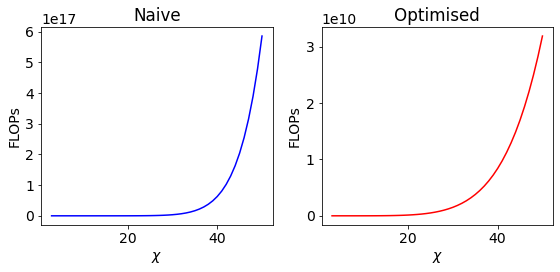

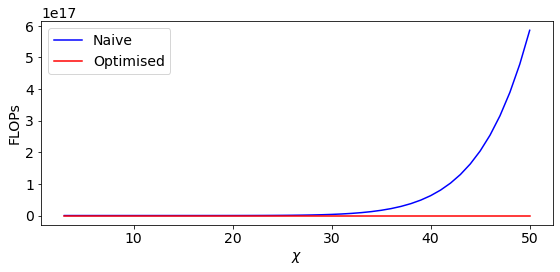

In [326]:
N, O = [], []
C = np.arange(3, 51)

for c in C:
    np.random.seed(42)
    lambda1 = np.random.normal(size=(c, c))
    lambda2 = np.random.normal(size=(c, c))
    lambda3 = np.random.normal(size=(c, c))
    G1 = np.random.normal(size=(c, c, c))
    G2 = np.random.normal(size=(c, c, c))
    U = np.random.normal(size=(c, c, c, c))
    
    res = np.einsum_path("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize=True)
    n, o = res[1].split('\n')[3:5]
    n = np.float64(n.split(' ')[-1])
    o = np.float64(o.split(' ')[-1])
    N.append(n)
    O.append(o)

    
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(C, N, color="blue")
plt.title("Naive")
plt.xlabel("$\chi$")
plt.ylabel("FLOPs")

plt.subplot(122)
plt.plot(C, O, color="red")
plt.title("Optimised")
plt.xlabel("$\chi$")
plt.ylabel("FLOPs")

plt.tight_layout()

plt.figure(figsize=(8,4))
plt.plot(C, N, color="blue", label="Naive")
plt.plot(C, O, color="red", label="Optimised")
plt.xlabel("$\chi$")
plt.ylabel("FLOPs")

plt.legend()

plt.tight_layout()

In [179]:
c=2
np.random.seed(42)
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

In [180]:
lambda1
G1

array([[[ 0.24196227, -1.91328024],
        [-1.72491783, -0.56228753]],

       [[-1.01283112,  0.31424733],
        [-0.90802408, -1.4123037 ]]])

In [319]:
def mY_Z(lambda1, lambda2, lambda3, G1, G2, U):
    c=2
    A = np.tensordot(lambda1,G1, axes=([1], [1]))
    B = np.tensordot(lambda2, G2, axes=([1],[1]))
    C = np.tensordot(B, lambda3, axes=([2], [0]))
    D = np.tensordot(A, C, axes=([2], [0]))
    Z = np.tensordot(D, U, axes=([1, 2], [2,3]))
    
    return Z

In [365]:
assert np.allclose(mY_Z(lambda1, lambda2, lambda3, G1, G2, U), Z(lambda1, lambda2, lambda3, G1, G2, U))

In [366]:
O, my, Oerr, myerr = [], [], [], []
C = np.arange(3, 50)

for c in C:
    np.random.seed(42)
    lambda1 = np.random.normal(size=(c, c))
    lambda2 = np.random.normal(size=(c, c))
    lambda3 = np.random.normal(size=(c, c))
    G1 = np.random.normal(size=(c, c, c))
    G2 = np.random.normal(size=(c, c, c))
    U = np.random.normal(size=(c, c, c, c))
    

    time1 = %timeit -o -q -n 2 -r 2 mY_Z(lambda1, lambda2, lambda3, G1, G2, U)
    time2 = %timeit -o -q -n 2 -r 2 Z(lambda1, lambda2, lambda3, G1, G2, U)
    
    my.append(time1.average)
    myerr.append(3*time1.stdev)
    O.append(3*time2.average)
    Oerr.append(time2.stdev)

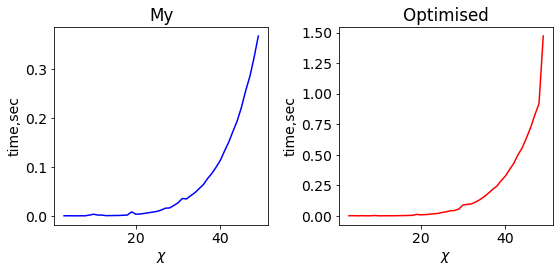

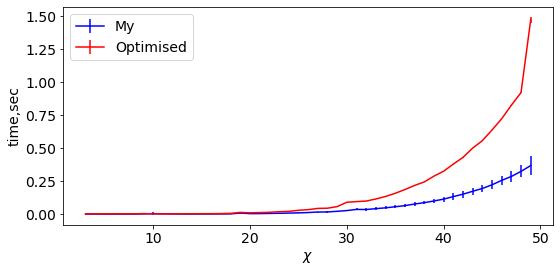

In [367]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(C, my, color="blue")
plt.title("My")
plt.xlabel("$\chi$")
plt.ylabel("time,sec")

plt.subplot(122)
plt.plot(C, O, color="red")
plt.title("Optimised")
plt.xlabel("$\chi$")
plt.ylabel("time,sec")

plt.tight_layout()

plt.figure(figsize=(8,4))
plt.errorbar(C, my, myerr, color="blue", label="My")
plt.errorbar(C, O, Oerr, color="red", label="Optimised")
plt.xlabel("$\chi$")
plt.ylabel("time,sec")

plt.legend()

plt.tight_layout()

# Задача 6.  k-means clustering. 

Выбор метрики (нормы разницы между любыми двумя векторами, или функции расстояния между любой парой точек) очень важен для многих алгоритмов машинного обучения. Рассмотрим на примере задачи кластеризации. 

Кластеризация — это разделение множества входных векторов на группы (кластеры) по степени «схожести» друг с другом.

Кластеризация в Data Mining приобретает ценность тогда, когда она выступает одним из этапов анализа данных, построения законченного аналитического решения. Аналитику часто легче выделить группы схожих объектов, изучить их особенности и построить для каждой группы отдельную модель, чем создавать одну общую модель для всех данных. Таким приемом постоянно пользуются в маркетинге, выделяя группы клиентов, покупателей, товаров и разрабатывая для каждой из них отдельную стратегию.


Евклидова метрика 


— наиболее распространенная. Она является геометрическим расстоянием в многомерном пространстве.


Квадрат евклидовой метрики. 


Иногда может возникнуть желание возвести в квадрат стандартное евклидово расстояние, чтобы придать большие веса более отдаленным друг от друга объектам.


Метрика городских кварталов (манхэттенская). 


Это расстояние является суммой модулей разностей координат. В большинстве случаев эта метрика приводит к таким же результатам, как и для обычного расстояния Евклида. Однако отметим, что для этой меры влияние отдельных больших разностей (выбросов) уменьшается (так как они не возводятся в квадрат).

Расстояние Чебышева. 

Это метрика шахматной доски (Расстоянием Чебышёва между n-мерными числовыми векторами называется максимум модуля разности компонент этих векторов). Это расстояние может оказаться полезным, когда желают определить два объекта как «различные», если они различаются по какой-либо одной координате (каким-либо одним измерением).

Расстояние Чебышёва называют также метрикой Чебышёва, равномерной метрикой, sup-метрикой и бокс-метрикой; также иногда она называется метрикой решётки, метрикой шахматной доски, метрикой хода короля и 8-метрикой.

Степенная метрика. 

Иногда желают прогрессивно увеличить или уменьшить вес, относящийся к размерности, для которой соответствующие объекты сильно отличаются. Это может быть достигнуто с использованием степенного расстояния.


Выбор метрики (критерия схожести) лежит полностью на исследователе. При выборе различных мер результаты кластеризации могут существенно отличаться.

Алгоритм k-means (k-средних)

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

Проблемы алгоритма k-means:
* необходимо заранее знать количество кластеров. Мной было предложено метод определения количества кластеров, который основывался на нахождении кластеров, распределенных по некоему закону (в моем случае все сводилось к нормальному закону). После этого выполнялся классический алгоритм k-means, который давал более точные результаты.
* алгоритм очень чувствителен к выбору начальных центров кластеров. Классический вариант подразумевает случайный выбор класторов, что очень часто являлось источником погрешности. Как вариант решения, необходимо проводить исследования объекта для более точного определения центров начальных кластеров. В моем случае на начальном этапе предлагается принимать в качестве центов самые отдаленные точки кластеров.
* не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному.


В блокноте kmeans.ipynb вы можете найти наивную реализацию.
Изучите код, убедитесь, что вы его поняли. Вы найдете там две функции dist_i и dist_ij, которые
(намеренно) реализованы довольно неэффективно. Улучшите их, избавившись от циклов с помощью век-
торизации из numpy, и измерьте ускорение алгоритма в целом при N = 10000.








In [64]:
N = 1000
K = 3
d = 3
L = 10

np.random.seed(42)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)

In [65]:
def scatter_plot(data, col=None):
    from mpl_toolkits.mplot3d import Axes3D 
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s = 0.5, color=col)
    plt.show()

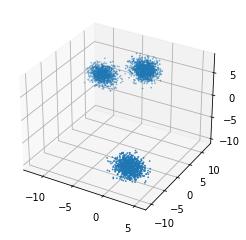

In [66]:
if d == 3:
    scatter_plot(data, None)

In [67]:
def naive_dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    dist = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        dist[i] = np.sum((x[i] - mu[i])**2)
    return dist

def naive_dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    dist = np.zeros((x.shape[0], mu.shape[0]))
    for i in range(x.shape[0]):
        for j in range(mu.shape[0]):
            dist[i, j] += np.sum((x[i] - mu[j])**2)
    return dist

def naive_kmeans():
    ss_list=[]
    mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]
    c = np.random.randint(low=0, high=K-1, size=data.shape[0])
    for n in range(10):
        c =  np.argmin(naive_dist_ij(data, mu), axis = 1)    
        ss = np.mean(naive_dist_i(data, mu[c]))
        ss_list.append(ss)    
        for i in range(K):
            cluster_members = data[c == i]
            cluster_members = cluster_members.mean(axis = 0)
            mu[i] = cluster_members
    return ss_list, c

In [79]:
def dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    return np.sum((x - mu)**2)

def dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    n, k = x.shape
    x_mod = np.transpose(x[None,...].repeat(k, axis=0), axes=(1, 0, 2))
    mu_mod = mu[None, ...]
    return np.sum((x_mod-mu_mod)*(x_mod-mu_mod), axis=2)
   
def kmeans():
    ss_list=[]
    mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]
    c = np.random.randint(low=0, high=K-1, size=data.shape[0])
    
    for _ in range(10):
        c =  np.argmin(dist_ij(data, mu), axis = 1)    
        ss = np.mean(dist_i(data, mu[c]))
        ss_list.append(ss)    
        for i in range(K):
            mu[i] = data[c==i].mean(axis=0)
    return ss_list, c

In [82]:
%timeit naive_kmeans()
%timeit kmeans()

885 ms ± 51.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_21445/3230926319.py:24: RuntimeWarning: Mean of empty slice.
  mu[i] = data[c==i].mean(axis=0)
/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


7.57 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


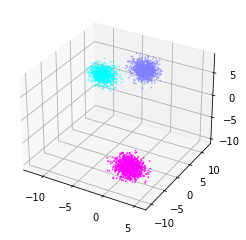

In [83]:
ss_list, c = kmeans()
plt.plot(ss_list)

colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])
if d == 3:
    scatter_plot(data, colors[c])

__Вывод:__

- При N=1000 naive_kmeans работает за 874 ms ± 77.6 ms ms, kmeans за 7.7 ms ± 265 µs, т.е. быстрее примерно в 100 раз

- naive_kmeans для N=10000 мой компухтер уже не вывозит

# Дополнительное задание. Нечеткий алгоритм кластеризации с-means.


С последней проблемой k-means успешно справляется алгоритм с-means. Вместо однозначного ответа на вопрос к какому кластеру относится объект, он определяет вероятность того, что объект принадлежит к тому или иному кластеру. Таким образом, утверждение «объект А принадлежит к кластеру 1 с вероятностью 90%, к кластеру 2 — 10% » верно и более удобно.

Остальные проблемы у с-means такие же, как у k-means, но они нивелируются благодаря нечеткости разбиения.

Метод нечеткой кластеризации C-средних имеет ограниченное применение из-за существенного недостатка — невозможность корректного разбиения на кластеры, в случае когда кластеры имеют различную дисперсию по различным размерностям (осям) элементов (например, кластер имеет форму эллипса). Данный недостаток устранен в алгоритмах Mixture models и GMM (Gaussian mixture models). 


Документация методов кластеризации для sklearn есть здесь https://scikit-learn.org/stable/modules/clustering.html#k-means . 



Используя библиотеку scikit-learn, реализуйте Gaussian mixture models и обычный k-means.  Подберите такой набор данных, на котором первый метод справляется хорошо, а второй метод даёт плохие результаты, и продемонстрируйте это. Сделайте это для нескольких разных метрик и сравните результаты между собой.

https://scikit-learn.ru/example/  примеры подобного.

https://neurohive.io/ru/osnovy-data-science/vvedenie-v-scikit-learn/  введение в sklearn. На этом сайте много полезных статей и ссылок на курсы. 